In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


((400, 1), (400, 1))

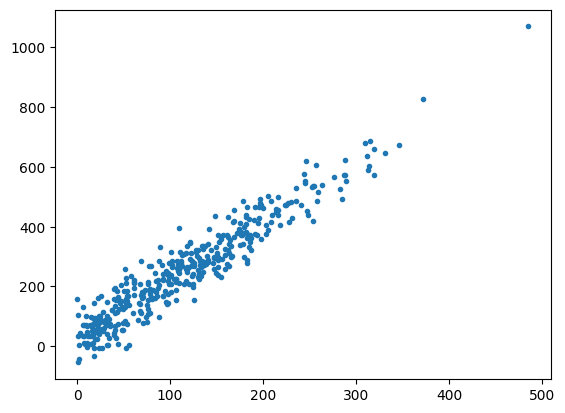

In [2]:
np.random.seed(42)
samples = 400

X = np.abs(np.random.normal(100, 100, size=(samples, 1)))

noise = np.random.normal(0, 50, size=(samples, 1))
y = 2*X+25+noise
plt.plot(X, y, '.')


X.shape, y.shape


In [3]:

remove_more_than_300_minutes_indices = np.where(X > 300)
remove_more_negative_cost_indices = np.where(y < 0)


In [4]:
y = np.delete(y, remove_more_than_300_minutes_indices)
X = np.delete(X, remove_more_than_300_minutes_indices)


In [5]:
y = np.delete(y, remove_more_negative_cost_indices)
X = np.delete(X, remove_more_negative_cost_indices)


In [6]:
X.shape, y.shape


((379,), (379,))

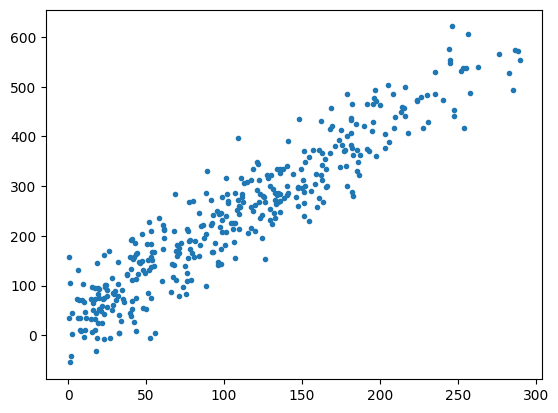

In [7]:
plt.plot(X, y, '.')


<AxesSubplot: >

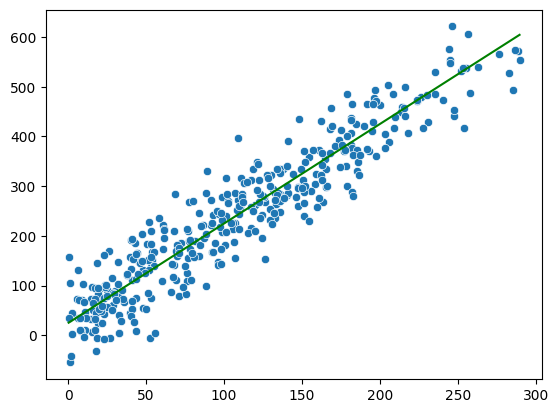

In [8]:
beta_0_ground_truth = 25
beta_1_ground_truth = 2


ground_truth = lambda x:  beta_0_ground_truth + beta_1_ground_truth*x

ax = sns.scatterplot(x=X, y=y)
sns.lineplot(x=X, y=ground_truth(X), color='green')


In [9]:
dataset = np.column_stack((X, y))
df = pd.DataFrame(dataset, columns=['Minutes', 'CostSEK'])
df.info


<bound method DataFrame.info of         Minutes     CostSEK
0    164.768854  354.799893
1    252.302986  531.955001
2     76.584663  155.666051
3     76.586304  209.315105
4    257.921282  487.461542
..          ...         ...
374   53.082435  183.822512
375   71.313453  165.649148
376  235.387237  529.849510
377   88.546015  203.507950
378  223.781631  474.051069

[379 rows x 2 columns]>

In [10]:
df.head()

,Minutes,CostSEK
0,164.768854,354.799893
1,252.302986,531.955001
2,76.584663,155.666051
3,76.586304,209.315105
4,257.921282,487.461542


### 1. Train|Test split


In [11]:
def train_test_split(random_state: int, train_faction: float, replace: bool, X:pd.DataFrame,y:pd.DataFrame) -> tuple:
    
    X_train_faction = int(len(X)*train_faction)
    X_train = X.sample(n=X_train_faction, random_state=random_state, replace=replace)
    X_test = X.drop(X_train.index)
    
    y_train_faction = int(len(y)*train_faction)
    y_train = y.sample(n=y_train_faction,random_state=random_state, replace=replace)
    y_test = y.drop(y_train.index)
    
    return (X_train, X_test,y_test, y_train)

In [12]:
tts = train_test_split(X=df['Minutes'], y=df['CostSEK'], random_state=42, train_faction=0.7, replace=False)
tts

(288    174.729361
 283    130.729952
 327     52.896169
 145    125.049285
 55      69.078762
           ...    
 292    227.766490
 206    165.139125
 254    263.241130
 354    245.114361
 4      257.921282
 Name: Minutes, Length: 265, dtype: float64,
 1      252.302986
 8       53.658231
 13      43.771247
 14       1.283112
 20     106.752820
           ...    
 363     47.424498
 369     10.158533
 372    283.145877
 376    235.387237
 378    223.781631
 Name: Minutes, Length: 114, dtype: float64,
 1      531.955001
 8      167.897205
 13      75.118167
 14     105.123823
 20     226.057434
           ...    
 363    150.378283
 369     66.797977
 372    527.454324
 376    529.849510
 378    474.051069
 Name: CostSEK, Length: 114, dtype: float64,
 288    339.241536
 283    223.904225
 327    156.675290
 145    279.428059
 55     111.395409
           ...    
 292    416.511512
 206    299.003798
 254    538.733400
 354    546.849109
 4      487.461542
 Name: CostSEK, Length: 265, 

In [13]:
len(tts[0]), len(tts[1]), len(tts[2]), len(tts[3])

(265, 114, 114, 265)

### Simple linear regression

In [14]:
X_train = tts[0]
X_test = tts[1]
y_test = tts[2]
y_train = tts[3]

In [15]:
X_train =pd.DataFrame({'Minutes':X_train.values})
X_test = pd.DataFrame({'Minutes':X_test.values})
y_test = pd.DataFrame({'CostSEK':y_test.values})
y_train = pd.DataFrame({'CostSEK':y_train.values})

In [16]:
y_test.head()

,CostSEK
0,531.955001
1,167.897205
2,75.118167
3,105.123823
4,226.057434


In [17]:
X_train.insert(0, 'Intercept', 1)
X_train.head()

,Intercept,Minutes
0,1,174.729361
1,1,130.729952
2,1,52.896169
3,1,125.049285
4,1,69.078762


In [18]:
X_test.insert(0, 'Intercept', 1)
X_test.head()

,Intercept,Minutes
0,1,252.302986
1,1,53.658231
2,1,43.771247
3,1,1.283112
4,1,106.752820


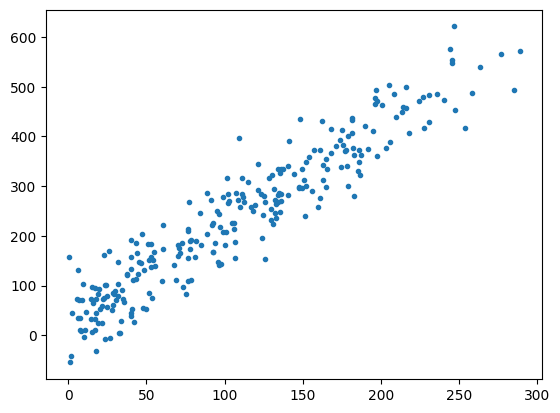

In [19]:
plt.plot(X_train['Minutes'], y_train['CostSEK'], '.')

In [20]:
X_train.head()

,Intercept,Minutes
0,1,174.729361
1,1,130.729952
2,1,52.896169
3,1,125.049285
4,1,69.078762


<AxesSubplot: xlabel='Minutes', ylabel='CostSEK'>

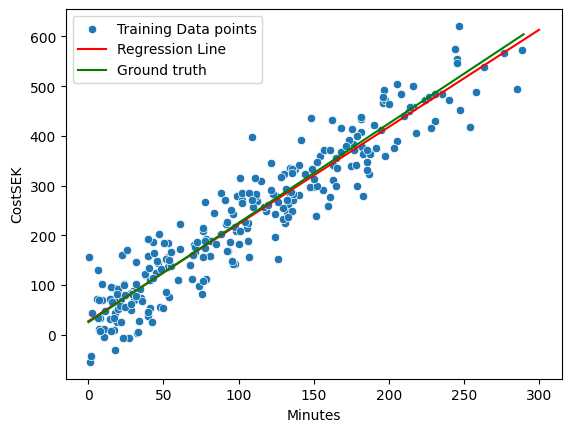

In [21]:
beta_1, beta_0 = np.polyfit(X_train['Minutes'], y_train['CostSEK'], deg=1)
# y_hat = lambda x: beta_o + (beta_i * x)
ground_truth
y_hat = lambda x: beta_0 + beta_1*x
a = np.linspace(0, 300)

# using regplot
# sns.regplot(x=X_train['Minutes'], y=y_train['CostSEK'], label='Data points')

# using scatterplot

ax = sns.scatterplot(x=X_train['Minutes'], y=y_train['CostSEK'], label="Training Data points")

sns.lineplot(x=a, y=y_hat(a), label="Regression Line", color="red")
sns.lineplot(x=X, y=ground_truth(X), color='green', label="Ground truth")
# sns.lineplot(x=spending, y=y_hat(spending), color='red')



### 3 prediction

In [22]:
regression_fit = lambda X,y: np.linalg.inv(X.T@X) @X.T @y
beta_hat = regression_fit(X_train, y_train)


print(f"Beta parameters: \n{beta_hat}")

Beta parameters: 
     CostSEK
0  27.194069
1   1.954241


In [23]:
predict= lambda X, weights: X @ weights

beta_hat = np.reshape(beta_hat.to_numpy(), (2,1))
y_hat = predict(X_test, beta_hat).to_numpy()
y_hat[:1]

array([[520.25499743]])

In [24]:
y_hat[:5]

array([[520.25499743],
       [132.05520259],
       [112.73365029],
       [ 29.70157974],
       [235.81484556]])

In [25]:
y_test[:5]

,CostSEK
0,531.955001
1,167.897205
2,75.118167
3,105.123823
4,226.057434


In [26]:
beta_hat

array([[27.19406914],
       [ 1.95424135]])

In [27]:
y_hat.shape, X_test.shape

((114, 1), (114, 2))

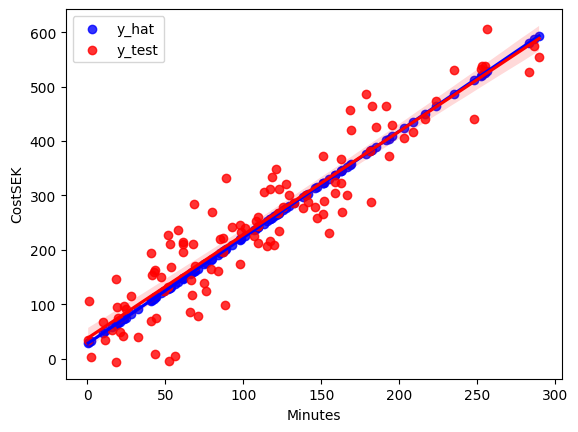

In [28]:
ax = sns.regplot(x=X_test['Minutes'], y=y_hat, label='y_hat', color='blue')
sns.regplot(x=X_test['Minutes'], y=y_test, label='y_test', color='red')
plt.legend()

mae|mse|rmse

In [29]:
m = len(y_test)

y_hat = np.reshape(y_hat, m)

In [34]:
mae = 1/m * np.sum(np.abs(y_test['CostSEK']-y_hat))
mse = 1/m * np.sum((y_test['CostSEK']-y_hat)**2)
rmse = np.sqrt(mse)

print(f"Mean absolute value = {mae} \n Mean square error = {mse} \n Root mean squared error = {rmse}")

Mean absolute value = 43.54070110273508 
 Mean square error = 2962.6577598889567 
 Root mean squared error = 54.430301853737284
